In [12]:
%matplotlib inline
from tensorflow.keras.utils import plot_model
from keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt  

In [26]:
data = pd.read_csv("/content/dataset.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [27]:
print(data.shape)
train=[]
for i in range(data.shape[0]):
  train.append(list(data.iloc[i]))

(2000, 21)


In [28]:
x=[]
y=[]
for i in train:
  y.append(i[-1])
  x.append(i[:20])
  
# x -= np.mean(x)
# x /= np.std(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)


In [29]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_train)

print(f'The class Num is : {len(np.unique(y_train))}')

[[1.412e+03 1.000e+00 2.400e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [8.080e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.619e+03 1.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.872e+03 1.000e+00 2.300e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.133e+03 0.000e+00 1.400e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.242e+03 1.000e+00 2.400e+00 ... 1.000e+00 0.000e+00 0.000e+00]]
The class Num is : 4


In [30]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)
print(y_test)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


Epoch 1/300
50/50 [==============================] - 11s 8ms/step - loss: 34.6248 - accuracy: 0.3831 - val_loss: 4.9940 - val_accuracy: 0.4375
Epoch 2/300
50/50 [==============================] - 0s 5ms/step - loss: 8.2690 - accuracy: 0.4025 - val_loss: 1.2829 - val_accuracy: 0.3675
Epoch 3/300
50/50 [==============================] - 0s 4ms/step - loss: 4.0720 - accuracy: 0.3519 - val_loss: 1.2359 - val_accuracy: 0.2300
Epoch 4/300
50/50 [==============================] - 0s 4ms/step - loss: 2.1895 - accuracy: 0.3344 - val_loss: 1.1556 - val_accuracy: 0.3125
Epoch 5/300
50/50 [==============================] - 0s 5ms/step - loss: 1.5447 - accuracy: 0.3556 - val_loss: 1.2146 - val_accuracy: 0.3450
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 1.4087 - accuracy: 0.3675 - val_loss: 1.1286 - val_accuracy: 0.4275
Epoch 7/300
50/50 [==============================] - 0s 4ms/step - loss: 1.3448 - accuracy: 0.4450 - val_loss: 1.0474 - val_accuracy: 0.5325
Epoch 8/300

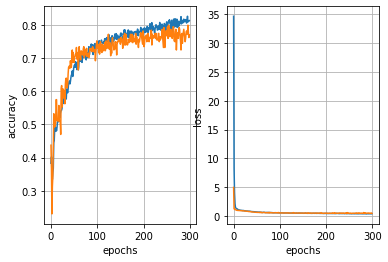

In [32]:
model = Sequential()
model.add(Dense(300, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
### YOU HAVE TO MAKE YOUR CHANGES HERE !!!
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=32,
                    verbose=1,
                    validation_data=(x_test,y_test))
plt.plot((10,5))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.grid(True)
plt.plot(history.history['val_accuracy'])

plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.grid(True)
plt.plot(history.history['val_loss'])
plt.show()

In [33]:
print(f'Accuracy of test data : {history.history["val_accuracy"][-1]}')
print(f'Accuracy of train data : {history.history["accuracy"][-1]}')
print(f'Loss of test data : {history.history["val_loss"][-1]}')
print(f'Loss of train data : {history.history["loss"][-1]}')


Accuracy of test data : 0.7699999809265137
Accuracy of train data : 0.8137500286102295
Loss of test data : 0.49998173117637634
Loss of train data : 0.4458144009113312
